## **Neural Networks**
part 1: MLP without backpropagation

### **Imports**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from network.mlp import MLP
from metrics.metrics import mse

from network.losses import LossMSE
from network.activations import Sigmoid, Identity

### **Dataset: Square Simple**

In [2]:
square_simple_train = pd.read_csv("./data/regression/square-simple-training.csv")
square_simple_test = pd.read_csv("./data/regression/square-simple-test.csv")
square_simple_train.head(4)

,Unnamed: 0,x,y
0,1,-0.171543,-127.351580
1,2,0.025201,-129.942844
2,3,-1.368991,38.672367
3,4,1.907390,197.432191


In [3]:
square_simple_train.drop(columns=["Unnamed: 0"], inplace=True)
square_simple_train.head(4)

,x,y
0,-0.171543,-127.351580
1,0.025201,-129.942844
2,-1.368991,38.672367
3,1.907390,197.432191


Dataset visualization.

Text(0.5, 1.0, 'Square Simple Training Data')

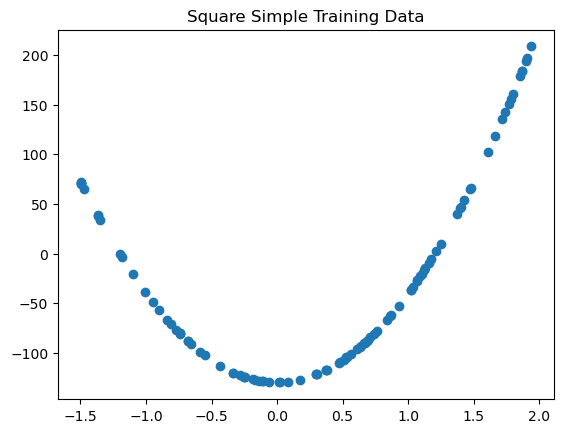

In [4]:
plt.scatter(square_simple_train["x"], square_simple_train["y"])
plt.title("Square Simple Training Data")

#### Example 1.
1 hidden layer with 5 neurons

Let's preprare the settings for network configuration. We will use uniform weights & biases' sampling. Some details are printed for demonstration purposes.

In [7]:
layers_1 = [
    {"input_size" : 1, "output_size" : 5, "activation" : "sigmoid", "init" : "uniform"},
    {"input_size" : 5, "output_size" : 1, "activation" : "identity", "init" : "uniform"}
]
mlp = MLP(layers_init=layers_1, input=square_simple_train[["x"]])
print("Layers: ", mlp.layers)
print("Depth: ", mlp.depth)
print("Weights (layer 0): ", mlp.layers[0].weights)
print("Biases (layer 0):",  mlp.layers[0].biases)

result = mlp.forward(square_simple_train[["x"]])

Layers:  [<network.layers.FullyConnectedLayer object at 0x14d259010>, <network.layers.FullyConnectedLayer object at 0x14d24c410>]
Depth:  2
Weights (layer 0):  [[0.08138869]
 [0.4366858 ]
 [0.46512111]
 [0.30345772]
 [0.78521508]]
Biases (layer 0): [[0.01257676]
 [0.48953386]
 [0.49167076]
 [0.15013792]
 [0.36943408]]


In [8]:
result.head(4)

,0
0,1.602390
1,1.644985
2,1.338393
3,1.992243


Let's visualize predictions.

Text(0.5, 1.0, 'Real data vs. prediction')

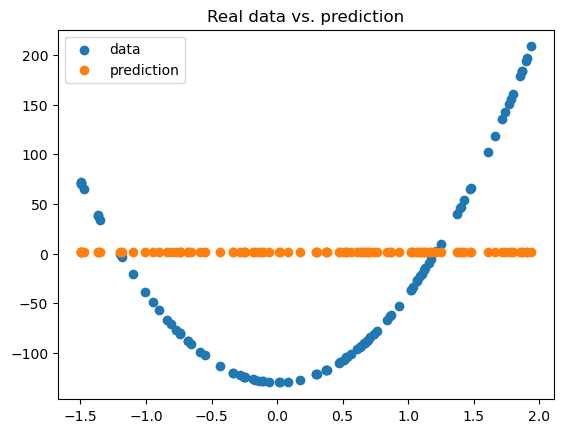

In [9]:
plt.scatter(square_simple_train["x"], square_simple_train["y"], label="data")
plt.scatter(square_simple_train["x"], result, label="prediction")
plt.legend()
plt.title("Real data vs. prediction")

The results are far from ideal. It may be assumed that MSE is enormous.

In [10]:
mse(result.to_numpy(), square_simple_train[["y"]].values)

np.float64(10198.969383671756)

Indeed, over 10 000 definitely is not a desired outcome.

To manually set weights and biases, we will configure them in a following way. There will be the leading pair of approx. symmetric sigmoids (neurons 1 and 2). Their role is to shape the curvature of the parabola. The next pair of approx. symmetric sigmoids (neurons 3 and 4) is used to catch the details of the shape. Last neuron is tuned in order to improve MSE.

train:  20.002142113198392
test:  7.5891657563860715


Text(0.5, 1.0, 'Real data vs. prediction')

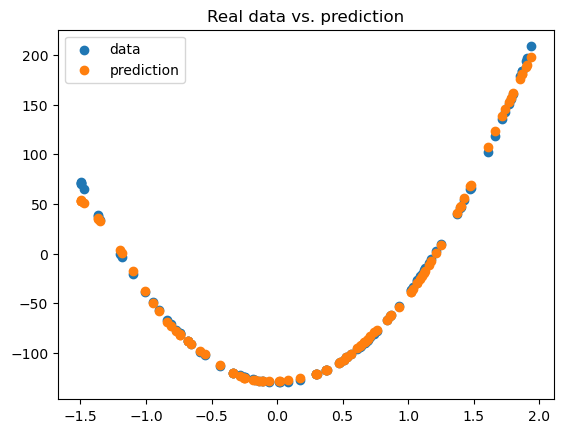

In [27]:
layers_1 = [
    {"input_size" : 1, "output_size" : 5, "activation" : "sigmoid",
     "weights" : np.array([4.42, -2.64, 9.8, -9.12, 0.12]).reshape(5,1),
     "biases" : np.array([4.94, 4.22, 4, 5.37, 5.31]).reshape(5,1)},
    {"input_size" : 5, "output_size" : 1, "activation" : "identity",
     "weights" : np.array([-198, -443.94, -23.52, -19.46, 5.87]).reshape(1,5),
     "biases" : np.array([542.1806]).reshape(1,1)}
]

mlp_1 = MLP(layers_init=layers_1, input=square_simple_train[["x"]])

result_1 = mlp_1.forward(square_simple_train[["x"]])
print("train: ", mse(mlp_1.forward(square_simple_train[["x"]]).to_numpy(), square_simple_train[["y"]]))
print("test: ", mse(mlp_1.forward(square_simple_test[["x"]]).to_numpy(), square_simple_test[["y"]]))


plt.scatter(square_simple_train["x"], square_simple_train["y"], label="data")
plt.scatter(square_simple_train["x"], result_1, label="prediction")
plt.legend()
plt.title("Real data vs. prediction")

MSE = 7.59 (on test dataset)

#### Example 2. 
1 hidden layer with 10 neurons

train:  20.002142113198378
test:  7.5891657563860395


Text(0.5, 1.0, 'Real data vs. prediction')

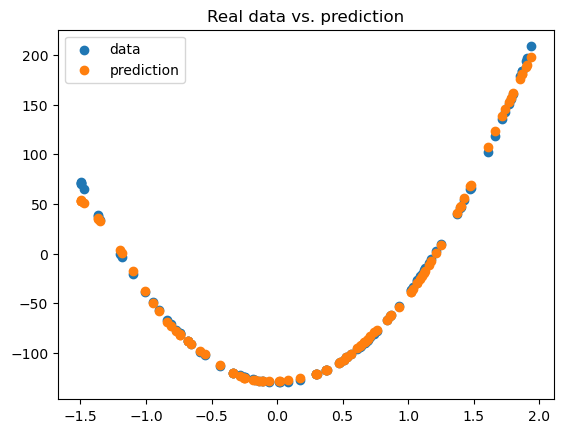

In [29]:
layers_2 = [
    {"input_size" : 1, "output_size" : 10, "activation" : "sigmoid",
     "weights" : np.array([4.42, -2.64, 9.8, -9.12, 0.12, 0, 0, 0, 0, 0]).reshape(10,1),
     "biases" : np.array([4.94, 4.22, 4, 5.37, 5.31, 0, 0, 0, 0, 0]).reshape(10,1)},
    {"input_size" : 10, "output_size" : 1, "activation" : "identity",
     "weights" : np.array([-198, -443.94, -23.52, -19.46, 5.87, 0, 0, 0, 0, 0]).reshape(1,10),
     "biases" : np.array([542.1806]).reshape(1,1)}
]

mlp_2 = MLP(layers_init=layers_2, input=square_simple_train[["x"]])

result_2 = mlp_2.forward(square_simple_train[["x"]])
print("train: ", mse(mlp_2.forward(square_simple_train[["x"]]).to_numpy(), square_simple_train[["y"]]))
print("test: ", mse(mlp_2.forward(square_simple_test[["x"]]).to_numpy(), square_simple_test[["y"]]))


plt.scatter(square_simple_train["x"], square_simple_train["y"], label="data")
plt.scatter(square_simple_train["x"], result_2, label="prediction")
plt.legend()
plt.title("Real data vs. prediction")

MSE = 7.59 (on test dataset)

### **Dataset: Steps Large**

In [5]:
steps_large_train = pd.read_csv("./data/regression/steps-large-training.csv")
steps_large_test = pd.read_csv("./data/regression/steps-large-test.csv")
steps_large_train.head(4)

,Unnamed: 0,x,y
0,1,-1.481354,-80
1,2,1.033264,80
2,3,-0.076403,0
3,4,-1.419785,-80


Dataset visualization.

Text(0.5, 1.0, 'Steps Large Training Data')

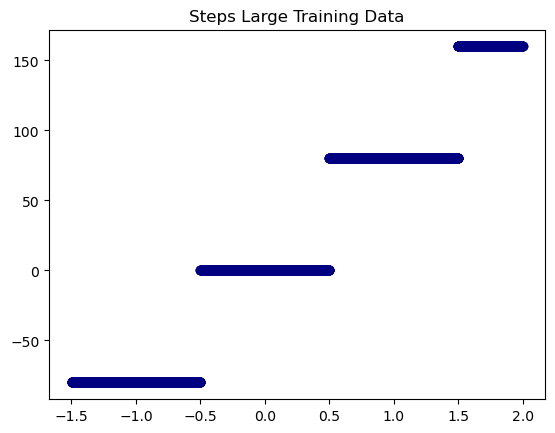

In [6]:
plt.scatter(steps_large_train["x"], steps_large_train["y"], color = "navy")
plt.title("Steps Large Training Data")

#### Example 4.
1 hidden layer with 5 neurons

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Real data vs. prediction (random weights)')

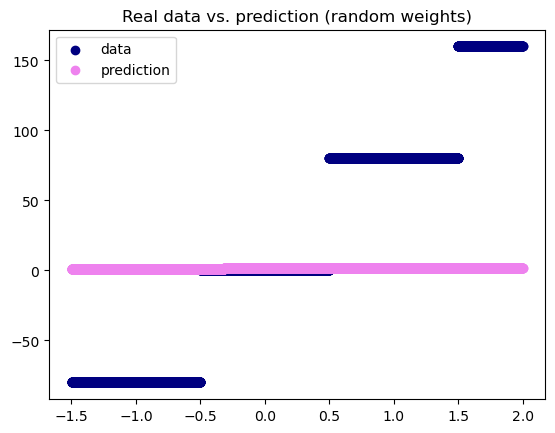

In [29]:
layers_4 = [
    {"input_size" : 1, "output_size" : 5, "activation" : Sigmoid(), "init" : "uniform"},
    {"input_size" : 5, "output_size" : 1, "activation" : Identity(), "init" : "uniform"}
]
mlp_4 = MLP(layers_init=layers_4, input=steps_large_train[["x"]], loss_function=LossMSE(), random_state=42)

print(type(steps_large_train[["x"]].to_numpy()))
result_4 = mlp_4.forward(steps_large_train[["x"]])

plt.scatter(steps_large_train["x"], steps_large_train["y"], label="data", color='navy')
plt.scatter(steps_large_train["x"], result_4, label="prediction", color='violet')
plt.legend()
plt.title("Real data vs. prediction (random weights)")

In [22]:
mse(result_4.to_numpy(), steps_large_train[["y"]])

np.float64(7252.893423679075)

We need to improve the predictions by tunning weights and biases. Since the activation function for hidden layers is *sigmoid* and there are 5 neurons and there are three peeks in the dataset, we would like to use 3 neurons (3 sigmoids). The steepest part of the simoid shall be between the steps - at -0.5, 0.5 and 1.5. Additionaly, we want the steepest part of the sigmoid to be as steep as possible (coefficients in first layer around 100 gives us MSE ~22, 1000 - ~3, 10000 ~0.1).

2.090984203763538


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Real data vs. prediction')

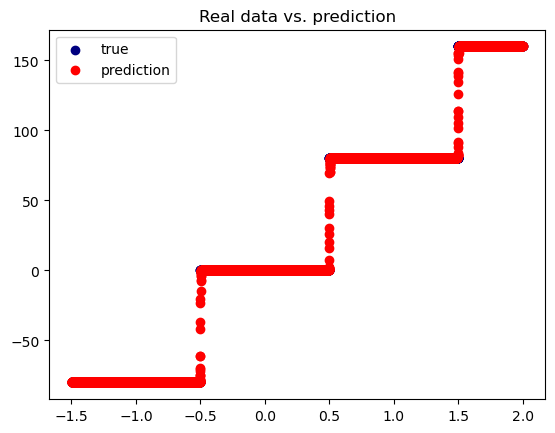

In [25]:
layers_4 = [
    {"input_size" : 1, "output_size" : 5, "activation" : Sigmoid(),
     "weights" : np.array([1000, 1000, 1000, 0, 0]).reshape(5,1),
     "biases" : np.array([500, -500, -1500, 0, 0]).reshape(5,1)},
    {"input_size" : 5, "output_size" : 1, "activation" : Identity(),
     "weights" : np.array([80, 80, 80, 0, 0]).reshape(1,5),
     "biases" : np.array([-80]).reshape(1,1)}
]

mlp_4 = MLP(layers_init=layers_4, input=steps_large_train[["x"]], loss_function=None)

result_4 = mlp_4.forward(steps_large_train[["x"]])
print(mse(mlp_4.forward(steps_large_train[["x"]]).to_numpy(), steps_large_train[["y"]]))

plt.scatter(steps_large_train["x"], steps_large_train["y"], label="true", color="navy")
plt.scatter(steps_large_train["x"], result_4, label="prediction", color="red")
plt.legend()
plt.title("Real data vs. prediction")

MSE = 2.09 (on training dataset)

In [20]:
mse(mlp_4.forward(steps_large_test[["x"]]).to_numpy(), steps_large_test[["y"]])

/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


np.float64(2.7559169626888314)

MSE = 2.76 (on test dataset)

#### Example 5.
1 hidden layer with 10 neurons

2.090984203763538


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Real data vs. prediction')

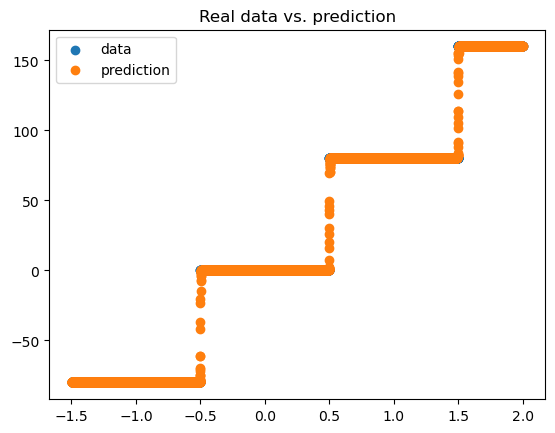

In [21]:
layers_5 = [
    {"input_size" : 1, "output_size" : 10, "activation" : "sigmoid",
     "weights" : np.array([1000, 1000, 1000, 0, 0, 0, 0, 0, 0, 0]).reshape(10,1),
     "biases" : np.array([500, -500, -1500, 0, 0, 0, 0, 0, 0, 0]).reshape(10,1)},
    {"input_size" : 10, "output_size" : 1, "activation" : "identity",
     "weights" : np.array([80, 80, 80, 0, 0, 0, 0, 0, 0, 0]).reshape(1,10),
     "biases" : np.array([-80]).reshape(1,1)}
]

mlp_5 = MLP(layers_init=layers_5, input=steps_large_train[["x"]])

result_5 = mlp_5.forward(steps_large_train[["x"]])
print(mse(mlp_5.forward(steps_large_train[["x"]]).to_numpy(), steps_large_train[["y"]]))

plt.scatter(steps_large_train["x"], steps_large_train["y"], label="data")
plt.scatter(steps_large_train["x"], result_5, label="prediction")
plt.legend()
plt.title("Real data vs. prediction")

In [22]:
mse(mlp_5.forward(steps_large_test[["x"]]).to_numpy(), steps_large_test[["y"]])

/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


np.float64(2.755916962688831)

MSE = 2.76 (on test dataset)

#### Example 6.
2 hidden layers with 5 neurons each

1.139009743853289


/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)
/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Real data vs. prediction')

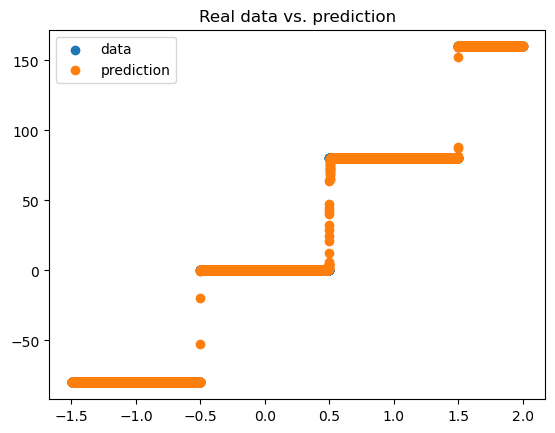

In [23]:
layers_6 = [
    {"input_size" : 1, "output_size" : 5, "activation" : "sigmoid",
     "weights" : np.array([-1000, 1000, 100, 0, 0]).reshape(5,1),
     "biases" : np.array([-500, -1500, -50, 0, 0]).reshape(5,1)},
     {"input_size" : 5, "output_size" : 5, "activation" : "sigmoid",
     "weights" : np.array([[30,0,0,0,0],
                          [0,30,0,0,0],
                          [0,0,30,0,0],
                          [0,0,0,0,0],
                          [0,0,0,0,0]]).reshape(5,5),
     "biases" : np.array([-15, -15, -15, 0, 0]).reshape(5,1)},
    {"input_size" : 5, "output_size" : 1, "activation" : "identity",
     "weights" : np.array([-80, 80, 80, 0, 0]).reshape(1,5),
     "biases" : np.array([0]).reshape(1,1)}
]

mlp_6 = MLP(layers_init=layers_6, input=steps_large_train[["x"]])

result_6 = mlp_6.forward(steps_large_train[["x"]])
print(mse(mlp_6.forward(steps_large_train[["x"]]).to_numpy(), steps_large_train[["y"]]))

plt.scatter(steps_large_train["x"], steps_large_train["y"], label="data")
plt.scatter(steps_large_train["x"], result_6, label="prediction")
plt.legend()
plt.title("Real data vs. prediction")

In [24]:
mse(mlp_6.forward(steps_large_test[["x"]]).to_numpy(), steps_large_test[["y"]])

/Users/gasparsekula/anaconda3/envs/mio/lib/python3.13/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


np.float64(1.8310504831721224)

MSE = 1.83 (on test dataset)